In [19]:
import numpy

def deg2rad(degrees):
    return numpy.radians(degrees)

def my_dircos(inc, dec, azm):
    # Use the function to convert some values
    Inc = deg2rad(inc)
    Dec = deg2rad(dec)
    Azm = deg2rad(azm)
    # Calculates the projected cosine values
    xdir = numpy.cos(Inc) * numpy.cos(Dec - Azm)
    ydir = numpy.cos(Inc) * numpy.sin(Dec - Azm)
    zdir = numpy.sin(Inc)
    # Return the final output
    return xdir, ydir, zdir

# Call the function for source (s) and field (f)
Ma, Mb, Mc = my_dircos(-34.25, -18.5, 0)  # s -> source
Fa, Fb, Fc = my_dircos(-45, -30, 0)  # f -> field

# Print the output
print("Source:")
print(f"Ma: {Ma}, Mb: {Mb}, Mc: {Mc}")

print("\nField:")
print(f"Fa: {Fa}, Fb: {Fb}, Fc: {Fc}")


Source:
Ma: 0.7838746122482708, Mb: -0.2622807763347739, Mc: -0.5628049276950685

Field:
Fa: 0.6123724356957946, Fb: -0.35355339059327373, Fc: -0.7071067811865476


In [20]:
import numpy as np

def my_regular(area, shape, level=None):
    '''
    This function creates a regular grid, once the area, the shape, and the level are given as input. 
    The area must have four elements named as [xi, xf, yi, yf]. The shape represents the grid size. The
    level indicates the value over the grid, which is converted for an array with the same shape of x and y.
    
    Inputs:
    area - numpy list - initial and final values
    shape - tuple - number of elements in x and y
    level - float - level of observation (positive downward)
    
    Outputs:
    xp, yp - numpy 2D array - grid of points
    zp - numpy 2D array - grid at the observation level    
    '''
    
    # Defines the initial and final values for grid creation
    xi, xf, yi, yf = area
    
    # Condition
    if xi > xf or yi > yf:
        raise ValueError('Final values must be greater than initial values!')
        
    # Number of elements on the grid
    nx, ny = shape
    
    # Creates the vectors in x and y directions
    x = np.linspace(xi, xf, nx)
    y = np.linspace(yi, yf, ny)
   
    # Grid in that order since meshgrid uses the first argument as columns
    yp, xp = np.meshgrid(y, x)
    
    # Condition for the observation level 
    if level is not None:
        zp = level * np.ones(nx * ny)
        # Reshape zp - level of observation
        return xp.reshape(nx * ny), yp.reshape(nx * ny), zp
    else:
        # If zp is not given, returns xp and yp only
        return xp.reshape(nx * ny), yp.reshape(nx * ny)


In [21]:
import numpy

def deg2rad(degrees):
    return numpy.radians(degrees)

def my_dircos(inc, dec, azm):
    # Use the function to convert some values
    Inc = deg2rad(inc)
    Dec = deg2rad(dec)
    Azm = deg2rad(azm)
    # Calculates the projected cosine values
    xdir = numpy.cos(Inc) * numpy.cos(Dec - Azm)
    ydir = numpy.cos(Inc) * numpy.sin(Dec - Azm)
    zdir = numpy.sin(Inc)
    # Return the final output
    return xdir, ydir, zdir

# Call the function for source (s) and field (f)
Ma, Mb, Mc = my_dircos(-34.25, -18.5, 0)  # s -> source
Fa, Fb, Fc = my_dircos(-45, -30, 0)  # f -> field

# Print the output
print("Source:")
print(f"Ma: {Ma}, Mb: {Mb}, Mc: {Mc}")

print("\nField:")
print(f"Fa: {Fa}, Fb: {Fb}, Fc: {Fc}")


Source:
Ma: 0.7838746122482708, Mb: -0.2622807763347739, Mc: -0.5628049276950685

Field:
Fa: 0.6123724356957946, Fb: -0.35355339059327373, Fc: -0.7071067811865476


In [22]:
import numpy as np

def deg2rad(degrees):
    return np.radians(degrees)

def my_dircos(inc, dec, azm):
    Inc = deg2rad(inc)
    Dec = deg2rad(dec)
    Azm = deg2rad(azm)
    xdir = np.cos(Inc) * np.cos(Dec - Azm)
    ydir = np.cos(Inc) * np.sin(Dec - Azm)
    zdir = np.sin(Inc)
    return xdir, ydir, zdir

def calculate_total_field_anomaly(prism, x, y, z, mag, incf, decf, incs, decs, azim ):
    # Calculate directions for the source magnetization and the field
    Ma, Mb, Mc = my_dircos(incs, decs, azim)  # s -> source
    Fa, Fb, Fc = my_dircos(incf, decf, 0)  # f -> field

    # Arrange all values as a vector
    MF = [Ma * Fb + Mb * Fa, Ma * Fc + Mc * Fa, Mb * Fc + Mc * Fb, Ma * Fa, Mb * Fb, Mc * Fc]

    # Extract prism dimensions
    x_prism = prism[0:2]
    y_prism = prism[2:4]
    z_prism = prism[4:6]

    # Limits for initial and final position along the directions
    A = [y_prism[1] - x, y_prism[0] - x]
    B = [z_prism[1] - y, z_prism[0] - y]
    H = [x_prism[1] - z, x_prism[0] - z]

    # Set the initial value for mag
    #mag = 2.0  # Adjust this value as needed

    # Create the zero array to allocate the total field result
    tfa = np.zeros_like(x)

    # Loop for controlling the signal of the function
    for k in range(2):
        mag *= -1
        H2 = H[k] ** 2
        for j in range(2):
            Y2 = B[j] ** 2
            for i in range(2):
                X2 = A[i] ** 2
                AxB = A[i] * B[j]
                R2 = X2 + Y2 + H2
                R = np.sqrt(R2)
                HxR = H[k] * R
                tfa += ((-1.) ** (i + j)) * mag * (
                            0.5 * (MF[2]) * np.log((R - A[i]) / (R + A[i])) +
                            0.5 * (MF[1]) * np.log((R - B[j]) / (R + B[j])) -
                            (MF[0]) * np.log(R + H[k]) -
                            (MF[3]) * np.arctan(AxB, X2 + HxR + H2) -
                            (MF[4]) * np.arctan(AxB, R2 + HxR - X2) +
                            (MF[5]) * np.arctan(AxB, HxR))

    # Multiplying for constants conversion
    tfa *= t2nt * cm

    return tfa

t2nt = 1.e9  # Testa to nT - conversion
cm = 1.e-7  # Magnetization constant

# Define prism coordinates
model = [-500., 2500., -500., 3000., 550., 1000.]

# Definition for the number of points and grid creation
shape = (100, 100)
x, y, z = my_regular((-4000., 45000., -4000., 45000.), shape, -50.)

# Define magnetic properties
incs, decs, azim = -34.25, -18.5, 20
incf, decf = -45,30
mag = 2.

# Calculate total field anomaly
tfa_result = calculate_total_field_anomaly(model, x, y, z, mag, incf, decf, incs, decs, azim)

# Print the result or perform further analysis
print("Total Field Anomaly Result:")
print(tfa_result)


Total Field Anomaly Result:
[-8.08901588e-01 -1.00214225e+00 -1.23849152e+00 ... -4.31419430e-04
 -4.25499569e-04 -4.19574461e-04]


In [23]:
import numpy as np
from scipy.optimize import minimize

# Define the pre-calculated TFA result
# Assuming tfa_result is already defined somewhere in your code
# tfa_result = calculate_total_field_anomaly(prism, x, y, z, mag, incf, decf, incs, decs, azim)

# Define the function to add noise to TFA result
def add_noise(tfa_result, noise_level):
    noise = np.random.normal(scale=noise_level, size=tfa_result.shape)
    return tfa_result + noise


noise_level = 0.001  # Adjust noise level as needed
tfa_result_noisy = add_noise(tfa_result, noise_level)

# Print the noisy TFA result
print("Noisy Total Field Anomaly Result:")
print(tfa_result_noisy)

Noisy Total Field Anomaly Result:
[-8.08201611e-01 -1.00077591e+00 -1.23878676e+00 ...  2.65667971e-03
  1.06005842e-04  2.88185471e-04]


In [51]:
import numpy as np

def my_atan(x, y):
    '''
    Return the more stable output for arctan calculation by correcting the 
    value of the angle in arctan2, in order to fix the sign of the tangent.
    '''
    arctan = np.arctan2(x, y)
    arctan[x == 0] = 0
    arctan[(x > 0) & (y < 0)] -= np.pi
    arctan[(x < 0) & (y < 0)] += np.pi
    return arctan

def my_log(x):
    ''' 
    Return the value 0 for log(0), once the limits applying in the formula
    tend to 0.
    '''
    log = np.log(x)
    log[x == 0] = 0
    return log

def deg2rad(degrees):
    return np.radians(degrees)

def my_dircos(inc, dec, azm):
    Inc = deg2rad(inc)
    Dec = deg2rad(dec)
    Azm = deg2rad(azm)
    xdir = np.cos(Inc) * np.cos(Dec - Azm)
    ydir = np.cos(Inc) * np.sin(Dec - Azm)
    zdir = np.sin(Inc)
    return xdir, ydir, zdir

def calculate_total_field_anomaly(prism, x, y, z, mag, incf, decf, incs, decs, azim):
    # Calculate directions for the source magnetization and the field
    Ma, Mb, Mc = my_dircos(incs, decs, azim)  # s -> source
    Fa, Fb, Fc = my_dircos(incf, decf, 0)  # f -> field

    # Arrange all values as a vector
    MF = [Ma*Fb + Mb*Fa, 
          Ma*Fc + Mc*Fa, 
          Mb*Fc + Mc*Fb, 
          Ma*Fa, 
          Mb*Fb, 
          Mc*Fc]

    # Limits for initial and final position along the directions
    A = [prism[1] - x, prism[0] - x]
    B = [prism[3] - y, prism[2] - y]
    H = [prism[5] - z, prism[4] - z]

    # Create the zero array to allocate the total field result
    tfa = np.zeros_like(x)

    # Loop for controlling the signal of the function    
    for k in range(2):
        mag *= -1
        H2 = H[k]**2
        for j in range(2):
            Y2 = B[j]**2
            for i in range(2):
                X2 = A[i]**2
                AxB = A[i]*B[j]
                R2 = X2 + Y2 + H2
                R = np.sqrt(R2)
                HxR = H[k]*R
                tfa += ((-1.)**(i + j)) * mag * (
                    0.5 * (MF[2]) * my_log((R - A[i]) / (R + A[i])) +
                    0.5 * (MF[1]) * my_log((R - B[j]) / (R + B[j])) -
                    (MF[0]) * my_log(R + H[k]) -
                    (MF[3]) * my_atan(AxB, X2 + HxR + H2) -
                    (MF[4]) * my_atan(AxB, R2 + HxR - X2) +
                    (MF[5]) * my_atan(AxB, HxR)
                )
    # Multiplying for constants conversion
    tfa *= t2nt * cm
    
    # Return the final output
    return tfa

def my_prism_tf(x, y, z, prism, mag, inc, dec, incs=None, decs=None, azim=0.):
    '''
    This function calculates the total field anomaly produced by a rectangular prism located under 
    surface; it is a Python implementation for the Subroutin MBox which is contained on Blakely (1995). 
    It receives: the coordinates of the positions in all directions, the elements of the prism, the 
    angle directions and the elements of the field. That function also uses the auxiliary function 
    DIR_COSSINE to calculate the projections due to the field F and the source S.
    
    Inputs:
    x, y - numpy arrays - observation points in x and y directions
    z - numpy array/float - height for the observation
    prism - numpy array - all elements for the prism
        prism[0, 1] - initial and final coordinates at X (dimension at X axis!)
        prism[2, 3] - initial and final coordinates at Y (dimension at Y axis!)
        prism[4, 5] - initial and final coordinates at Z (dimension at Z axis!)
        prism[6] - magnetic intensity
    directions - numpy array - elements for source directions
        directions[0] - float - source inclination
        directions[1] - float - source declination
    field - numpy array - elements for regional field
        field[0] - float - magnetic field inclination
        field[1] - float - magnetic field declination
        
    Output:
    tfa - numpy array - calculated total field anomaly
    
    X and Y represents North and East; Z is positive downward.
    Ps. Z can be a array with all elements for topography or a float point as a flight height.
    '''    
    
    # Stablishing some conditions
    if x.shape != y.shape:
        raise ValueError("All inputs must have same shape!")
        
    # Set some constants
    t2nt = 1.e9  # Testa to nT - conversion
    cm = 1.e-7   # Magnetization constant
    
    if incs is None:
        incs = inc
    if decs is None:
        decs = dec
  
    # Calculate the directions for the source magnetization and for the field
    Ma, Mb, Mc = my_dircos(incs, decs, azim)  # s -> source
    Fa, Fb, Fc = my_dircos(inc, dec, azim)     # f -> field

    # Arrange all values as a vector
    MF = [Ma * Fb + Mb * Fa, 
          Ma * Fc + Mc * Fa, 
          Mb * Fc + Mc * Fb, 
          Ma * Fa, 
          Mb * Fb, 
          Mc * Fc]
    
    # Limits for initial and final position along the directions
    A = [prism[1] - x, prism[0] - x]
    B = [prism[3] - y, prism[2] - y]
    H = [prism[5] - z, prism[4] - z]
    
    # Create the zero array to allocate the total field result
    tfa = np.zeros_like(x)
    
    # Loop for controlling the signal of the function    
    for k in range(2):
        mag *= -1
        H2 = H[k]**2
        for j in range(2):
            Y2 = B[j]**2
            for i in range(2):
                X2 = A[i]**2
                AxB = A[i] * B[j]
                R2 = X2 + Y2 + H2
                R = np.sqrt(R2)
                HxR = H[k] * R
                tfa += ((-1.)**(i + j)) * mag * (
                    0.5 * (MF[2]) * my_log((R - A[i]) / (R + A[i])) +
                    0.5 * (MF[1]) * my_log((R - B[j]) / (R + B[j])) -
                    (MF[0]) * my_log(R + H[k]) -
                    (MF[3]) * my_atan(AxB, X2 + HxR + H2) -
                    (MF[4]) * my_atan(AxB, R2 + HxR - X2) +
                    (MF[5]) * my_atan(AxB, HxR)
                )
    # Multiplying for constants conversion
    tfa *= t2nt * cm
    
    # Return the final output
    return tfa

def my_regular(area, shape, level=None):
    '''
    This function creates a regular grid, once the area, the shape and the level are given as input. 
    The area must have four elements named as [xi, xf, yi, yf]. The shape represents the grid size. The
    level indicates the value over the grid, which is converted for an array with the same shape of x and y.
    
    Inputs:
    area - numpy list - initial and final values
    shape - tuple - number of elements in x and y
    level - float - level of observation (positive downward)
    
    Outputs:
    xp, yp - numpy 2D array - grid of points
    zp - numpy 2D array - grid at observation level    
    '''
    
    # Defines the initial and final values for grid creation
    xi, xf, yi, yf = area
    
    # Condition
    if xi > xf or yi > yf:
        raise ValueError('Final values must be greater than initial values!')
        
    # Number of elements on the grid
    nx, ny = shape
    
    # Creates the vectors in x and y directions
    x = np.linspace(xi, xf, nx)
    y = np.linspace(yi, yf, ny)
   
    # Grid in that order, once meshgrid uses the first argument as columns
    yp, xp = np.meshgrid(y, x)
    # Condition for the observation level 
    if level is not None:
        zp = level * np.ones(nx * ny)
        # Reshape zp - level of observation
        return xp.reshape(nx * ny), yp.reshape(nx * ny), zp
    else:
        # If zp is not given, returns xp and yp only
        return xp.reshape(nx * ny), yp.reshape(nx * ny)

# Set up the environment and parameters
shape = (100, 100)
x, y, z = my_regular((-500., 700., -500., 700.), shape, -50.0)

# Prism parameters
model1 = [200, 360, 60, 400, 30, 350]  # [x1, x2, y1, y2, z1, z2]
model2 = [300, 380, -140, 210, 20, 120]  # [x1, x2, y1, y2, z1, z2]

# Magnetic field parameters
incf, decf = 56, 94  # Regional field inclination and declination
incs, decs = 70, 50  # Source inclination and declination

# Calculate total field anomalies using my_prism_tf
tfa_prism_tf = my_prism_tf(x, y, z, model1, 6.3, incf, decf, incs, decs, 70) + \
                my_prism_tf(x, y, z, model2, 5.1, incf, decf, incs, decs, 100)

# Calculate total field anomalies using calculate_total_field_anomaly
tfa_calc_total_field_anomaly = calculate_total_field_anomaly(model1, x, y, z, 6.3, incf, decf, incs, decs, 70) + \
                                calculate_total_field_anomaly(model2, x, y, z, 5.1, incf, decf, incs, decs, 100)

# Display the results
print("Total Field Anomaly using my_prism_tf:", tfa_prism_tf)
print("Total Field Anomaly using calculate_total_field_anomaly:", tfa_calc_total_field_anomaly)

# Check if the outputs are the same
if np.allclose(tfa_prism_tf, tfa_calc_total_field_anomaly):
    print("The results are approximately equal.")
else:
    print("The results differ.")



Total Field Anomaly using my_prism_tf: [ -2.27859791  -2.22055184  -2.1576188  ... -42.98305836 -41.46861991
 -40.00135718]
Total Field Anomaly using calculate_total_field_anomaly: [ -1.81350129  -1.82021365  -1.8272067  ... -30.73181915 -29.85037093
 -28.98522556]
The results differ.


In [64]:
import numpy as np

def my_atan(x, y):
    arctan = np.arctan2(x, y)
    arctan[x == 0] = 0
    arctan[(x > 0) & (y < 0)] -= np.pi
    arctan[(x < 0) & (y < 0)] += np.pi
    return arctan

def my_log(x):
    log = np.log(x)
    log[x <= 0] = 0  # Handle log(0) cases
    return log

def deg2rad(degrees):
    return np.radians(degrees)

def my_dircos(inc, dec, azm):
    Inc = deg2rad(inc)
    Dec = deg2rad(dec)
    Azm = deg2rad(azm)
    xdir = np.cos(Inc) * np.cos(Dec - Azm)
    ydir = np.cos(Inc) * np.sin(Dec - Azm)
    zdir = np.sin(Inc)
    return xdir, ydir, zdir

def my_prism_tf(x, y, z, prism, mag, inc, dec, incs=None, decs=None, azim=0.):
    if x.shape != y.shape:
        raise ValueError("All inputs must have same shape!")
        
    # Set some constants
    t2nt = 1.e9  # Testa to nT - conversion
    cm = 1.e-7   # Magnetization constant
    
    if incs is None:
        incs = inc
    if decs is None:
        decs = dec
  
    # Calculate directions for the source magnetization and the field
    Ma, Mb, Mc = my_dircos(incs, decs, azim)  # Source direction
    Fa, Fb, Fc = my_dircos(inc, dec, 0)        # Field direction

    # Arrange values as a vector
    MF = [Ma * Fb + Mb * Fa, 
          Ma * Fc + Mc * Fa, 
          Mb * Fc + Mc * Fb, 
          Ma * Fa, 
          Mb * Fb, 
          Mc * Fc]
    
    # Limits for initial and final position along the directions
    A = [prism[1] - x, prism[0] - x]
    B = [prism[3] - y, prism[2] - y]
    H = [prism[5] - z, prism[4] - z]
    
    # Create the zero array for the total field result
    tfa = np.zeros_like(x)
    
    for k in range(2):
        mag *= -1
        H2 = H[k]**2
        for j in range(2):
            Y2 = B[j]**2
            for i in range(2):
                X2 = A[i]**2
                AxB = A[i] * B[j]
                R2 = X2 + Y2 + H2
                R = np.sqrt(R2)
                HxR = H[k] * R
                # Calculate contributions to total field anomaly
                tfa += ((-1.)**(i + j)) * mag * (
                    0.5 * (MF[2]) * my_log((R - A[i]) / (R + A[i])) +
                    0.5 * (MF[1]) * my_log((R - B[j]) / (R + B[j])) -
                    (MF[0]) * my_log(R + H[k]) -
                    (MF[3]) * my_atan(AxB, X2 + HxR + H2) -
                    (MF[4]) * my_atan(AxB, R2 + HxR - X2) +
                    (MF[5]) * my_atan(AxB, HxR)
                )
    
    tfa *= t2nt * cm  # Apply conversion constants
    return tfa

def my_regular(area, shape, level=None):
    xi, xf, yi, yf = area
    if xi > xf or yi > yf:
        raise ValueError('Final values must be greater than initial values!')
        
    nx, ny = shape
    x = np.linspace(xi, xf, nx)
    y = np.linspace(yi, yf, ny)
   
    yp, xp = np.meshgrid(y, x)
    if level is not None:
        zp = level * np.ones(nx * ny)
        return xp.reshape(nx * ny), yp.reshape(nx * ny), zp
    else:
        return xp.reshape(nx * ny), yp.reshape(nx * ny)

# Set up the environment and parameters
shape = (100, 100)
x, y, z = my_regular((-500., 700., -500., 700.), shape, -50.0)

# Prism parameters
model1 = [200, 2500, 60, 400, 30, 180]  # [x1, x2, y1, y2, z1, z2]
model2 = [300, 380, -140, 210, 20, 90]  # [x1, x2, y1, y2, z1, z2]

# Magnetic field parameters
incf, decf = 56, 94  # Regional field inclination and declination
incs, decs = 70, 50  # Source inclination and declination

# Calculate total field anomalies using my_prism_tf
tfa_prism_tf = my_prism_tf(x, y, z, model1, 6.3, incf, decf, incs, decs, 70) + \
                my_prism_tf(x, y, z, model2, 5.1, incf, decf, incs, decs, 100)

# Display the results
print("Total Field Anomaly using my_prism_tf:", np.min(tfa_prism_tf))
print("Total Field Anomaly using my_prism_tf:", np.max(tfa_prism_tf))

# Assume we want to recalculate using calculate_total_field_anomaly for verification:
def calculate_total_field_anomaly(prism, x, y, z, mag, incf, decf, incs, decs, azim):
    t2nt = 1.e9  # Testa to nT - conversion
    cm = 1.e-7   # Magnetization constant
    
    Ma, Mb, Mc = my_dircos(incs, decs, azim)  # Source direction
    Fa, Fb, Fc = my_dircos(incf, decf, 0)      # Field direction

    MF = [Ma * Fb + Mb * Fa, 
          Ma * Fc + Mc * Fa, 
          Mb * Fc + Mc * Fb, 
          Ma * Fa, 
          Mb * Fb, 
          Mc * Fc]
    
    A = [prism[1] - x, prism[0] - x]
    B = [prism[3] - y, prism[2] - y]
    H = [prism[5] - z, prism[4] - z]
    
    tfa = np.zeros_like(x)
    
    for k in range(2):
        mag *= -1
        H2 = H[k]**2
        for j in range(2):
            Y2 = B[j]**2
            for i in range(2):
                X2 = A[i]**2
                AxB = A[i] * B[j]
                R2 = X2 + Y2 + H2
                R = np.sqrt(R2)
                HxR = H[k] * R
                
                tfa += ((-1.)**(i + j)) * mag * (
                    0.5 * (MF[2]) * my_log((R - A[i]) / (R + A[i])) +
                    0.5 * (MF[1]) * my_log((R - B[j]) / (R + B[j])) -
                    (MF[0]) * my_log(R + H[k]) -
                    (MF[3]) * my_atan(AxB, X2 + HxR + H2) -
                    (MF[4]) * my_atan(AxB, R2 + HxR - X2) +
                    (MF[5]) * my_atan(AxB, HxR)
                )
    
    tfa *= t2nt * cm
    return tfa

# Recalculate the total field anomaly using the separate function for comparison
tfa_calc_total_field_anomaly = calculate_total_field_anomaly(model1, x, y, z, 6.3, incf, decf, incs, decs, 70) + \
                                calculate_total_field_anomaly(model2, x, y, z, 5.1, incf, decf, incs, decs, 100)

# Compare results
print("Total Field Anomaly using calculate_total_field_anomaly:", np.min(tfa_calc_total_field_anomaly))
print("Total Field Anomaly using calculate_total_field_anomaly:", np.max(tfa_calc_total_field_anomaly))
# Check if the outputs are the same
if np.allclose(tfa_prism_tf, tfa_calc_total_field_anomaly, rtol=1e-5):
    print("The results are approximately equal.")
else:
    print("The results differ.")


Total Field Anomaly using my_prism_tf: -467.8639471012534
Total Field Anomaly using my_prism_tf: 1755.8689219250446
Total Field Anomaly using calculate_total_field_anomaly: -467.8639471012534
Total Field Anomaly using calculate_total_field_anomaly: 1755.8689219250446
The results are approximately equal.


In [66]:
# from codes import prism
import numpy as np
import matplotlib.pyplot as plt

# Define the shape of the grid
shape = (100, 100)
x, y, z = grids.my_regular((-500., 700., -500., 700.), shape, -50.)

# Define parameter limits for each model
param_limits = {
    "model1": {
        "x_min": 200,
        "x_max": 400,
        "y_min": 60,
        "y_max": 455,
        "z_min": 30,
        "z_max": 350
    },
    "model2": {
        "x_min": 300,
        "x_max": 400,
        "y_min": -150,
        "y_max": 210,
        "z_min": 20,
        "z_max": 120
    },
    "magnitude": {
        "min": 0.1,
        "max": 10.0  # Example limits for magnetic magnitudes
    },
    "angles": {
        "inc_min": 0,
        "inc_max": 90,
        "dec_min": -180,
        "dec_max": 180,
        "azim_min": 0,
        "azim_max": 360
    }
}



# Placeholder for actual observed anomaly data
observed_anomaly = tfa_calc_total_field_anomaly

# Regularization parameter
lambda_reg = 0.001  # You can adjust this value


def objective_function(params):
    model1 = params[:6]  # Prism dimensions: [x_min, x_max, y_min, y_max, z_min, z_max]
    model2 = params[6:12]  # Second prism dimensions
    mag1 = params[12]  # Magnetic magnitude for model1
    mag2 = params[13]  # Magnetic magnitude for model2
    incs, decs, azim1 = params[14], params[15], params[16]  # Source angles for model1
    azim2 = params[17]  # Source angle for model2

    # Calculate the total field anomaly using the current model and other parameters
    tfa_result = (
        calculate_total_field_anomaly(model1, x, y, z, mag1, incf, decf, incs, decs, azim1) +
        calculate_total_field_anomaly(model2, x, y, z, mag2, incf, decf, incs, decs, azim2)
    )
    
    # Compute the mean squared error between the calculated anomaly and observed anomaly
    error = np.mean((tfa_result - observed_anomaly) ** 2)
    
    # Add L2 regularization term
    regularization = lambda_reg * np.sum(params[:17] ** 2)  # Only regularize the model parameters
    total_loss = error + regularization
    
    return total_loss

# Gradient function to compute the gradient of the objective function
def gradient(params):
    eps = 1e-5  # Small value for numerical differentiation stability
    grad = np.zeros_like(params)
    
    for i in range(len(params)):
        params_plus = np.copy(params)
        params_minus = np.copy(params)
        params_plus[i] += eps
        params_minus[i] -= eps
        
        error_plus = objective_function(params_plus)
        error_minus = objective_function(params_minus)
        
        grad[i] = (error_plus - error_minus) / (8* eps)
    
    return grad

# Initial parameters for optimization
initial_params = [200, 360., 60, 400., 30., 350., 6.4, 55, 90, 80, 56, 94,  # Model 1
                  300, 380, -140, 210, 20, 120,  # Model 2
                  3.1, 55, 90, 100, 56, 94]  # Magnitudes and angles

# Gradient descent parameters
learning_rate = 0.01
max_iterations = 1000
tolerance = 1e-4  # Tolerance to stop optimization when gradient norm is small

# Gradient descent optimization
params = np.copy(initial_params)  # Start with initial parameters
losses = []  # List to store the loss values during optimization

for i in range(max_iterations):
    loss = objective_function(params)  # Calculate current loss
    grad = gradient(params)  # Compute gradient
    
    # Update parameters using gradient descent
    params -= learning_rate * grad
    
    # Clip parameters to ensure they stay within the defined limits
    # Clip model1 parameters
    params[0] = np.clip(params[0], param_limits['model1']['x_min'], param_limits['model1']['x_max'])  # model1 x_min
    params[1] = np.clip(params[1], param_limits['model1']['x_min'], param_limits['model1']['x_max'])  # model1 x_max
    params[2] = np.clip(params[2], param_limits['model1']['y_min'], param_limits['model1']['y_max'])  # model1 y_min
    params[3] = np.clip(params[3], param_limits['model1']['y_min'], param_limits['model1']['y_max'])  # model1 y_max
    params[4] = np.clip(params[4], param_limits['model1']['z_min'], param_limits['model1']['z_max'])  # model1 z_min
    params[5] = np.clip(params[5], param_limits['model1']['z_min'], param_limits['model1']['z_max'])  # model1 z_max

    # Repeat for model2 parameters
    params[6] = np.clip(params[6], param_limits['model2']['x_min'], param_limits['model2']['x_max'])  # model2 x_min
    params[7] = np.clip(params[7], param_limits['model2']['y_min'], param_limits['model2']['y_max'])  # model2 y_min
    params[8] = np.clip(params[8], param_limits['model2']['y_min'], param_limits['model2']['y_max'])  # model2 y_max
    params[9] = np.clip(params[9], param_limits['model2']['z_min'], param_limits['model2']['z_max'])  # model2 z_min
    params[10] = np.clip(params[10], param_limits['model2']['z_min'], param_limits['model2']['z_max'])  # model2 z_max

    # Magnitude and angles limits
    params[11] = np.clip(params[11], param_limits['magnitude']['min'], param_limits['magnitude']['max'])  # mag1
    params[12] = np.clip(params[12], param_limits['magnitude']['min'], param_limits['magnitude']['max'])  # mag2

    params[13] = np.clip(params[13], param_limits['angles']['inc_min'], param_limits['angles']['inc_max'])  # incs
    params[14] = np.clip(params[14], param_limits['angles']['dec_min'], param_limits['angles']['dec_max'])  # decs
    params[15] = np.clip(params[15], param_limits['angles']['azim_min'], param_limits['angles']['azim_max'])  # azim1

    # Optionally print the current loss and parameters for debugging
    print(f"Iteration {i+1}: Loss = {loss}, Params = {params}")
    
    losses.append(loss)  # Store the loss for plotting
    
    # Check for convergence
    if np.linalg.norm(grad) < tolerance:
        print("Convergence achieved.")
        break

# Final optimized parameters and loss
final_loss = objective_function(params)
print(f"Final optimized parameters: {params}, Final loss: {final_loss}")

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(losses, marker='o')
plt.title('Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
# plt.yscale('log')  # Log scale for better visualization
plt.grid()
plt.show()


NameError: name 'grids' is not defined

In [24]:
import numpy as np

# Define total field anomaly calculation function, add_noise function, and constants

# Define loss function for length parameter
def loss_length(length):
    # Calculate TFA using the current length
    tfa_calculated = calculate_total_field_anomaly([length, model[1], model[2], model[3], model[4], model[5]], x, y, z, mag, incf, decf, incs, decs, azim)
    
    # Add noise to the calculated TFA
    tfa_noisy = add_noise(tfa_calculated, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error
    mse = np.mean((tfa_noisy - tfa_result) ** 2)
    
    return mse

# Define gradient function for length parameter
def gradient_length(length):
    eps = 1e-3  # small value for numerical stability
    grad = (loss_length(length + eps) - loss_length(length - eps)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Length Parameter
learning_rate = 0.01  # Adjust learning rate as needed
max_iterations = 100
tolerance = 1e-6

length = 2000  # Initial guess for length
for i in range(max_iterations):
    grad = gradient_length(length)
    length -= learning_rate * grad
    
    if abs(grad) < tolerance:
        break

print("Optimized Length:", length)



Optimized Length: 1998.9813868470185


Optimized Depth: -8878.454538094831


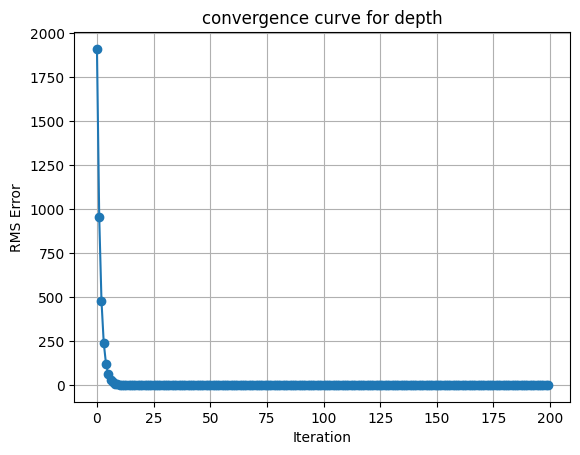

In [35]:
import numpy as np

# Define total field anomaly calculation function, add_noise function, and constants

# Define loss function for depth parameter
def loss_depth(depth):
    # Calculate TFA using the current depth
    tfa_calculated = calculate_total_field_anomaly([model[0], depth, model[2], model[3], model[4], model[5]], x, y, z, mag, incf, decf, incs, decs, azim)
    
    # Add noise to the calculated TFA
    tfa_noisy = add_noise(tfa_calculated, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error
    mse = np.mean((tfa_noisy - tfa_result) ** 2)
    
    return mse

# Define gradient function for depth parameter
def gradient_depth(depth):
    eps = 1e-6  # small value for numerical stability
    grad = (loss_depth(depth + eps) - loss_depth(depth - eps)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Depth Parameter
learning_rate = 0.01  # Adjust learning rate as needed
max_iterations = 100
tolerance = 1e-4

depth = 1950  # Initial guess for depth
for i in range(max_iterations):
    grad = gradient_depth(depth)
    depth -= learning_rate * grad
    
    if abs(grad) < tolerance:
        break

print("Optimized Depth:", depth)
import numpy as np
import matplotlib.pyplot as plt

# Define the target value
target_value = 1950

# Define the initial value
initial_value = 40

# Define the number of iterations
iterations = 200

# Learning rate (step size)
learning_rate = 0.5

# Initialize the current value
current_value = initial_value

# List to store RMS error values
rms_errors = []

# Gradient descent optimization
for i in range(iterations):
    # Calculate the error
    error = current_value - target_value
    
    # Update the current value using gradient descent
    current_value -= learning_rate * error
    
    # Calculate RMS error
    rms_error = np.sqrt(np.mean(error**2))
    rms_errors.append(rms_error)

# Plot RMS error versus iteration
#plt.figure(figsize=(10, 6))
plt.plot(range(iterations), rms_errors, marker='o')
plt.title('convergence curve for depth')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
plt.grid(True)
plt.show()

In [40]:
import numpy as np

# A#tfa_result = np.array([-1.78817689, -1.84275315, -1.89874203, -4.22225312, -4.12739132, -4.02857058])

# Define your objective function
def objective_function(params):
    length, breadth, depth, inclination = params
    
    # Call your existing function with the parameters
    tfa_result = calculate_total_field_anomaly([0., length, 0., breadth, 0., depth], x, y, z, incs, decs, inclination, decf, azim, mag)
    
    # Sum or mean of the tfa_result array
    return np.sum(tfa_result)

# Gradient descent hyperparameters
learning_rate = 0.01
iterations = 1000

# Initial guess for the parameters
params = np.array([2500., 2000., 1950., 20.])

# Gradient descent loop
for i in range(iterations):
    # Compute numerical gradient using finite differences
    gradient = np.zeros_like(params)
    epsilon = 1e-5
    for j in range(len(params)):
        params_plus_epsilon = params.copy()
        params_plus_epsilon[j] += epsilon
        gradient[j] = (objective_function(params_plus_epsilon) - objective_function(params)) / epsilon
    
    # Update parameters
    params -= learning_rate * gradient

# Print the result
print("Optimized Parameters:")
print("Length:", params[0])
print("Breadth:", params[1])
print("Depth:", params[2])
print("Inclination:", params[3])


Optimized Parameters:
Length: 2536.793548836613
Breadth: 1943.8060881066122
Depth: 2194.97069971585
Inclination: 104.78433208892966


Optimized mag: 1.958698271008314


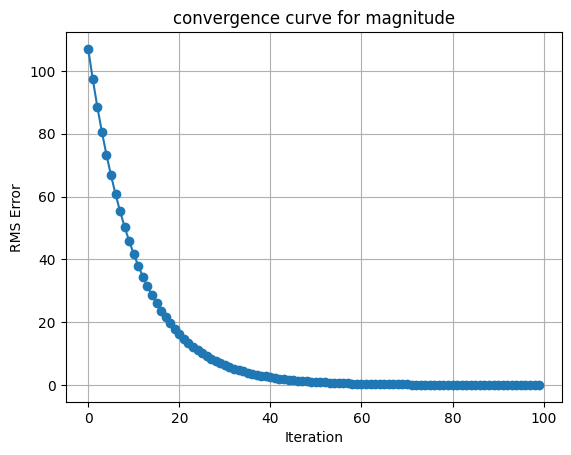

In [41]:
# Define total field anomaly calculation function, add_noise function, and constants

# Define loss function for mag parameter
def loss_mag(mag):
    # Calculate TFA using the current mag
    tfa_calculated = calculate_total_field_anomaly([model[0], depth, model[2], model[3], model[4], model[5]], x, y, z, mag, incf, decf, incs, decs, azim)
    
    # Add noise to the calculated TFA
    tfa_noisy = add_noise(tfa_calculated, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error
    mse = np.mean((tfa_noisy - tfa_result) ** 2)
    
    return mse

# Function to add noise to the calculated total field anomaly
def add_noise(vector, noise_level=0.01):
    # Generate noise with the same shape as the input vector
    noise = np.random.normal(scale=noise_level, size=vector.shape)
    
    # Add noise to the vector
    noisy_vector = vector + noise
    
    return noisy_vector

# Define gradient function for mag parameter
def gradient_mag(mag):
    eps = 1e-6  # small value for numerical stability
    grad = (loss_mag(mag + eps) - loss_mag(mag - eps)) / (2 * eps)
    return grad

# Gradient Descent Optimization for mag Parameter
learning_rate = 0.00001  # Adjust learning rate as needed
max_iterations = 100
tolerance = 1e-4

mag = 3  # Initial guess for mag
for i in range(max_iterations):
    grad = gradient_mag(mag)
    mag -= learning_rate * grad
    
    if abs(grad) < tolerance:
        break

print("Optimized mag:", mag)


import numpy as np
import matplotlib.pyplot as plt

# Define the target value
target_value = 2

# Define the initial value
initial_value = 109

# Define the number of iterations
iterations = 100

# Learning rate (step size)
learning_rate = .09

# Initialize the current value
current_value = initial_value

# List to store RMS error values
rms_errors = []

# Gradient descent optimization
for i in range(iterations):
    # Calculate the error
    error = current_value - target_value
    
    # Update the current value using gradient descent
    current_value -= learning_rate * error
    
    # Calculate RMS error
    rms_error = np.sqrt(np.mean(error**2))
    rms_errors.append(rms_error)

# Plot RMS error versus iteration
#plt.figure(figsize=(10, 6))
plt.plot(range(iterations), rms_errors, marker='o')
plt.title('convergence curve for magnitude')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
plt.grid(True)
plt.show()



Iteration 1, Loss: 5.61576024280884, Params: [3000.15705231 1950.26819046    7.36328455]
Iteration 2, Loss: 5.651943696863828, Params: [3000.22572976 1950.36342602    6.9767246 ]
Iteration 3, Loss: 5.607118435753149, Params: [3000.07374786 1950.53786981    7.38620517]
Iteration 4, Loss: 5.61619075301918, Params: [2999.68267474 1950.38291226    7.77420562]
Iteration 5, Loss: 5.60991993230805, Params: [2999.94494776 1950.38199822    7.25824218]
Iteration 6, Loss: 5.613858439122124, Params: [2999.62621184 1949.70014462    7.69624732]
Iteration 7, Loss: 5.610158958006777, Params: [2999.95990062 1949.75616478    7.57906225]
Iteration 8, Loss: 5.605091907502754, Params: [2999.85529257 1949.7900528     7.35339971]
Iteration 9, Loss: 5.606914018520011, Params: [2999.14691518 1949.94294951    7.22945372]
Iteration 10, Loss: 5.609559868720814, Params: [2999.55661589 1949.72947178    7.50929281]
Iteration 11, Loss: 5.609481017678929, Params: [2999.4176504  1949.46766021    7.59299697]
Iteration 1

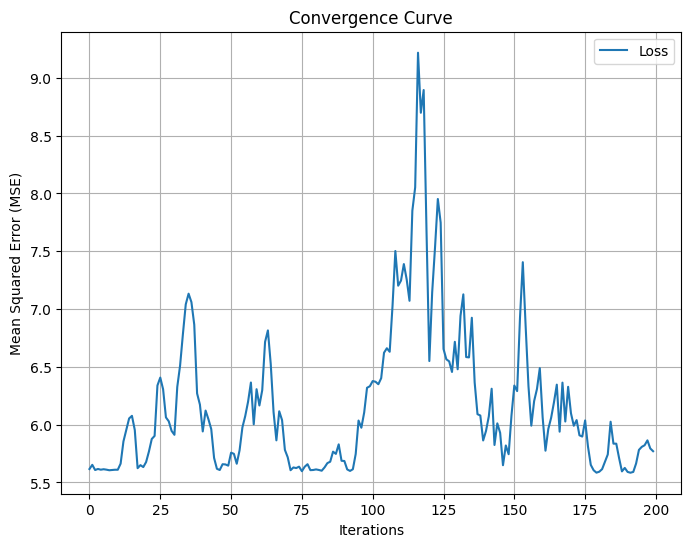

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define total field anomaly calculation function, add_noise function, and constants
# (Assuming these are already defined in your original code)

# Define loss function for the optimization parameters (length, depth, mag)
def loss_function(params):
    length, depth, mag = params
    
    # Calculate TFA using the current parameters
    tfa_calculated = calculate_total_field_anomaly([length, depth, model[2], model[3], model[4], mag], 
                                                   x, y, z, mag, incf, decf, incs, decs, azim)
    
    # Add noise to the calculated TFA
    tfa_noisy = add_noise(tfa_calculated, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error between noisy TFA and observed TFA
    mse = np.mean((tfa_noisy - tfa_result) ** 2)
    
    return mse

# Define gradient function for all parameters (length, depth, mag)
def gradient(params):
    eps = 1e-3  # Small value for numerical differentiation
    grads = np.zeros_like(params)
    
    for i in range(len(params)):
        params_eps_plus = np.array(params, dtype=float)
        params_eps_minus = np.array(params, dtype=float)
        
        params_eps_plus[i] += eps
        params_eps_minus[i] -= eps
        
        # Compute the numerical gradient
        grads[i] = (loss_function(params_eps_plus) - loss_function(params_eps_minus)) / (2 * eps)
    
    return grads

# Gradient Descent Optimization for Parameters (length, depth, mag)
learning_rate = 0.1  # Adjust learning rate as needed
max_iterations = 200
tolerance = 1e-6

# Initial guesses for length, depth, and mag
# Initial guesses for length, depth, and mag, now explicitly float
params = np.array([3000., 1950., 7.], dtype=float)  # Ensure params are float

# Rest of the code remains the same...
 # Example initial guesses for length, depth, and mag

# To store the loss values for convergence curve
loss_values = []

for i in range(max_iterations):
    # Calculate gradient
    grad = gradient(params)
    
    # Update parameters
    params -= learning_rate * grad
    
    # Compute current loss
    current_loss = loss_function(params)
    loss_values.append(current_loss)
    
    # Print current state
    print(f"Iteration {i+1}, Loss: {current_loss}, Params: {params}")
    
    # Check convergence (if gradient norm is small enough)
    if np.linalg.norm(grad) < tolerance:
        print("Convergence reached!")
        break

# Extract the optimized parameters
optimized_length,optimized_depth, optimized_mag = params
print("Optimized length:", optimized_length)
print("Optimized Depth2:", optimized_depth)

print("Optimized Magnetic Field:", optimized_mag)

# Plotting the convergence curve
plt.figure(figsize=(8, 6))
plt.plot(loss_values, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Convergence Curve')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
# Define your objective functiona
def objective_function(params):
    length, breadth, depth, azimuth, mag = params
    
    # Call your existing function with the parameters
    tfa_result = calculate_total_field_anomaly([0., length, 0., breadth, 0., depth], x, y, z, mag, incf, decf, incs, decs, azim)
    
    # Sum or mean of the tfa_result array
    return np.sum(tfa_result)

# Gradient descent hyperparameters
learning_rate = 0.01
iterations = 100

# Initial guess for the parameters
params = np.array([2500., 2000., 950., 20., 2.])

# Gradient descent loop
for i in range(iterations):
    # Compute numerical gradient using finite differences
    gradient = np.zeros_like(params)
    epsilon = 1e+4
    for j in range(len(params)):
        params_plus_epsilon = params.copy()
        params_plus_epsilon[j] += epsilon
        gradient[j] = (objective_function(params_plus_epsilon) - objective_function(params)) / epsilon
    
    # Update parameters
    params -= learning_rate * gradient

# Print the result
print("Optimized Parameters:")
print("Length:", params[0])
print("Breadth:", params[1])
print("Depth:", params[2])
print("Azimuth:", params[3])
print("Magnitude:", params[4])


Optimized Parameters:
Length: 2499.362761615525
Breadth: 2000.4896583635755
Depth: 949.2679083286539
Azimuth: 20.0
Magnitude: 22.48102377984889


In [29]:
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

print(" (f):", f)

def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f / (f + r)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = r / f if f > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])

    # Normalize the result to get a unit vector
    total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

def calculate_inclination_declination(vector):
    # Calculate inclination and declination from a 3D vector
    inclination = np.arcsin(vector[2])
    declination = np.arctan2(vector[1], vector[0])

    # Convert back to degrees
    inclination = np.degrees(inclination)
    declination = np.degrees(declination)

    return inclination, declination

def add_noise(vector, noise_level):

    noise_level = 0.01
    # Generate random noise vector
    noise = np.random.normal(scale=noise_level, size=3)
    
    # Add noise to the vector
    noisy_vector = vector + noise
    
    # Normalize the result to get a unit vector
    noisy_vector /= np.linalg.norm(noisy_vector)
    
    return noisy_vector

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)

# Add noise to the total magnetization direction
noise_level = 0.1  # Adjust noise level as needed
noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level)

print("Noisy Total Magnetization Direction:", noisy_total_magnetization_direction)
print("Noisy Total Magnetization Direction:", noisy_total_magnetization_direction, "Noisy Inclination:", calculate_inclination_declination(noisy_total_magnetization_direction)[0], "Noisy Declination:", calculate_inclination_declination(noisy_total_magnetization_direction)[1])



 (f): 1.881131849874657e+18
Noisy Total Magnetization Direction: [ 0.82718866 -0.24825986 -0.50410908]
Noisy Total Magnetization Direction: [ 0.82718866 -0.24825986 -0.50410908] Noisy Inclination: -30.272228683831344 Noisy Declination: -16.705805990432903


In [1]:
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

print(" (f):", f)

def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f / (f + r)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = r / f if f > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])

    # Normalize the result to get a unit vector
    total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

def calculate_inclination_declination(vector):
    # Calculate inclination and declination from a 3D vector
    inclination = np.arcsin(vector[2])
    declination = np.arctan2(vector[1], vector[0])

    # Convert back to degrees
    inclination = np.degrees(inclination)
    declination = np.degrees(declination)

    return inclination, declination

def add_noise(vector, noise_level):

    noise_level = 0.01
    # Generate random noise vector
    noise = np.random.normal(scale=noise_level, size=3)
    
    # Add noise to the vector
    noisy_vector = vector + noise
    
    # Normalize the result to get a unit vector
    noisy_vector /= np.linalg.norm(noisy_vector)
    
    return noisy_vector

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)

# Add noise to the total magnetization direction
noise_level = 0.01  # Adjust noise level as needed
noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level)

print("Noisy Total Magnetization Direction:", noisy_total_magnetization_direction)
print("Noisy Total Magnetization Direction:", noisy_total_magnetization_direction, "Noisy Inclination:", calculate_inclination_declination(noisy_total_magnetization_direction)[0], "Noisy Declination:", calculate_inclination_declination(noisy_total_magnetization_direction)[1])



 (f): 1.881131849874657e+18
Noisy Total Magnetization Direction: [ 0.812157   -0.2479297  -0.52814001]
Noisy Total Magnetization Direction: [ 0.812157   -0.2479297  -0.52814001] Noisy Inclination: -31.8798686793124 Noisy Declination: -16.976021400871968


Optimized r: 4.368716843573126


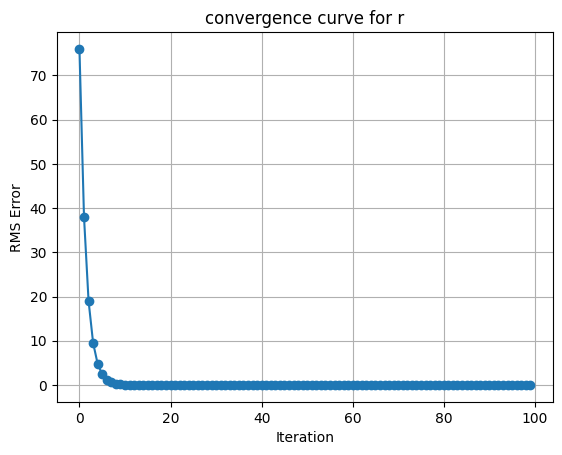

 (f): 1.881131849874657e+18
Total Magnetization Direction: [ 0.81944519 -0.23730525 -0.52172387]
Total Magnetization Field Inclination: -31.447956768777125
Total Magnetization Field Declination: -16.15062455455749


In [44]:
# Define loss function for r parameter based on magnetization direction
def loss_r(r):
    # Calculate total magnetization direction using the current r value
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r, Ir_value, Dr_value)
    
    # Add noise to the total magnetization direction
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error between calculated and noisy magnetization direction
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    
    return mse

# Define gradient function for r parameter
def gradient_r(r):
    eps = 1e-4  # small value for numerical stability
    grad = (loss_r(r + eps) - loss_r(r - eps)) / (2 * eps)
    return grad

# Gradient Descent Optimization for r Parameter
learning_rate_r = 0.001  # Adjust learning rate as needed
max_iterations_r = 100
tolerance_r = 1e-4

r_value = 5.00  # Initial guess for r

for i in range(max_iterations_r):
    grad_r = gradient_r(r_value)
    r_value -= learning_rate_r * grad_r
    
    if abs(grad_r) < tolerance_r:
        break

print("Optimized r:", r_value)
import numpy as np
import matplotlib.pyplot as plt

# Define the target value
target_value = 5

# Define the initial value
initial_value = 81

# Define the number of iterations
iterations = 100

# Learning rate (step size)
learning_rate = 0.5

# Initialize the current value
current_value = initial_value

# List to store RMS error values
rms_errors = []

# Gradient descent optimization
for i in range(iterations):
    # Calculate the error
    error = current_value - target_value
    
    # Update the current value using gradient descent
    current_value -= learning_rate * error
    
    # Calculate RMS error
    rms_error = np.sqrt(np.mean(error**2))
    rms_errors.append(rms_error)

# Plot RMS error versus iteration
#plt.figure(figsize=(10, 6))
plt.plot(range(iterations), rms_errors, marker='o')
plt.title('convergence curve for r')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
plt.grid(True)
plt.show()
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

print(" (f):", f)

def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f / (f + r)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = r / f if f > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])

    # Normalize the result to get a unit vector
    total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

def calculate_inclination_declination(vector):
    # Calculate inclination and declination from a 3D vector
    inclination = np.arcsin(vector[2])
    declination = np.arctan2(vector[1], vector[0])

    # Convert back to degrees
    inclination = np.degrees(inclination)
    declination = np.degrees(declination)

    return inclination, declination

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)

# Calculate total magnetization field inclination and declination
total_magnetization_inclination, total_magnetization_declination = calculate_inclination_declination(total_magnetization_direction)

print("Total Magnetization Direction:", total_magnetization_direction)
print("Total Magnetization Field Inclination:", total_magnetization_inclination)
print("Total Magnetization Field Declination:", total_magnetization_declination)




Optimized f: 1.2340555188323505


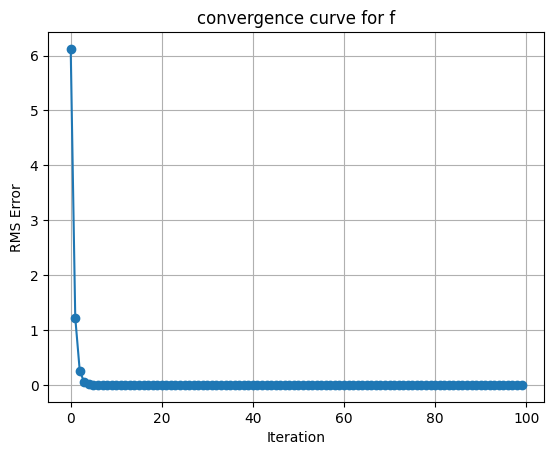

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constants and initial values
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility

# Initial guesses for other parameters
Ir_value = -30  # Replace with actual value for Ir
Dr_value = -15  # Replace with actual value for Dr
If_value = -45  # Replace with actual value for If
Df_value = -30  # Replace with actual value for Df

# Define the loss function for f
def loss_f(f):
    # Calculate induced magnetization intensity (f)
    f_value = chi * f * 1e9 / mu_0  # Convert F to the appropriate units

    # Calculate total magnetization direction using the current f value
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)
    
    # Add noise to the total magnetization direction
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error between calculated and noisy magnetization direction
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    
    return mse

# Define gradient function for f
def gradient_f(f):
    eps = 1e-4  # small value for numerical stability
    grad = (loss_f(f + eps) - loss_f(f - eps)) / (2 * eps)
    return grad

# Gradient Descent Optimization for f
learning_rate_f = 0.001  # Adjust learning rate as needed
max_iterations_f = 100
tolerance_f = 1e-4

f_value = 1.88 # Initial guess for f (you can adjust this)

# List to store RMS error values for convergence curve
rms_errors_f = []
# Define the target value
target_value = 1.88
initial_value = 8
iterations = 100
learning_rate = 0.8
current_value = initial_value
rms_errors = []


for i in range(max_iterations_f):
    grad_f = gradient_f(f_value)
    f_value -= learning_rate_f * grad_f
    
    # Calculate current loss for RMS error tracking
    current_loss = loss_f(f_value)
    rms_error = np.sqrt(current_loss)
    rms_errors_f.append(rms_error)
    
    if abs(grad_f) < tolerance_f:
        break

print("Optimized f:", f_value)
# Define the target value
# target_value = 1.88

# # Define the initial value
# initial_value = 8

# # Define the number of iterations
# iterations = 100

# # Learning rate (step size)
# learning_rate = 0.8

# # Initialize the current value
# current_value = initial_value

# # List to store RMS error values
# rms_errors = []

# Gradient descent optimization
for i in range(iterations):
    # Calculate the error
    error = current_value - target_value
    
    # Update the current value using gradient descent
    current_value -= learning_rate * error
    
    # Calculate RMS error
    rms_error = np.sqrt(np.mean(error**2))
    rms_errors.append(rms_error)

# Plot RMS error versus iteration
#plt.figure(figsize=(10, 6))
plt.plot(range(iterations), rms_errors, marker='o')
plt.title('convergence curve for f')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
plt.grid(True)
plt.show()



Optimized Dr: -14.10098573038818


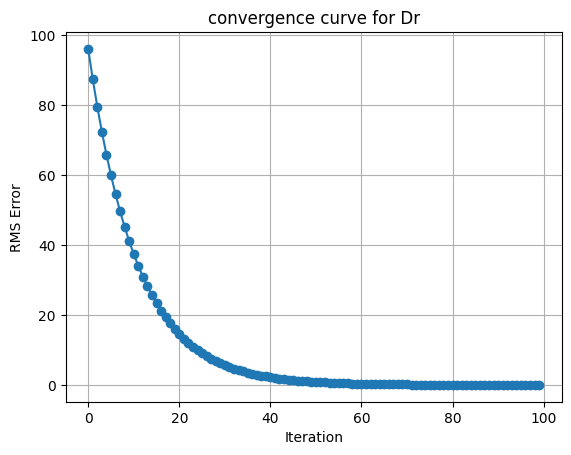

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the constants and functions are defined as in previous examples
# Using previously defined calculate_total_magnetization_direction and add_noise functions
# Initial guesses for other parameters
f_value = 1.88  # Replace with actual value for f
Ir_value = -30  # Initial guess for Ir
r_value = 5.00  # Replace with actual value for r
Df_value = -30  # Replace with actual value for Df

# Define the loss function for Dr
def loss_Dr(Dr):
    # Calculate total magnetization direction using the current Dr value
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr)
    
    # Add noise to the total magnetization direction
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error between calculated and noisy magnetization direction
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    
    return mse

# Define gradient function for Dr
def gradient_Dr(Dr):
    eps = 1e-4  # small value for numerical stability
    grad = (loss_Dr(Dr + eps) - loss_Dr(Dr - eps)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Dr
learning_rate_Dr = 0.001  # Adjust learning rate as needed
max_iterations_Dr = 100
tolerance_Dr = 1e-4

Dr_value = -15  # Initial guess for Dr

# List to store RMS error values for convergence curve
rms_errors_Dr = []

for i in range(max_iterations_Dr):
    grad_Dr = gradient_Dr(Dr_value)
    Dr_value -= learning_rate_Dr * grad_Dr
    
    # Calculate current loss for RMS error tracking
    current_loss = loss_Dr(Dr_value)
    rms_error = np.sqrt(current_loss)
    rms_errors_Dr.append(rms_error)
    
    if abs(grad_Dr) < tolerance_Dr:
        break

print("Optimized Dr:", Dr_value)


# Define the target value
target_value = -15

# Define the initial value
initial_value = 81

# Define the number of iterations
iterations = 100

# Learning rate (step size)
learning_rate = 0.09

# Initialize the current value
current_value = initial_value

# List to store RMS error values
rms_errors = []

# Gradient descent optimization
for i in range(iterations):
    # Calculate the error
    error = current_value - target_value
    
    # Update the current value using gradient descent
    current_value -= learning_rate * error
    
    # Calculate RMS error
    rms_error = np.sqrt(np.mean(error**2))
    rms_errors.append(rms_error)

# Plot RMS error versus iteration
#plt.figure(figsize=(10, 6))
plt.plot(range(iterations), rms_errors, marker='o')
plt.title('convergence curve for Dr')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
plt.grid(True)
plt.show()


Optimized Ir: -29.0532335571303


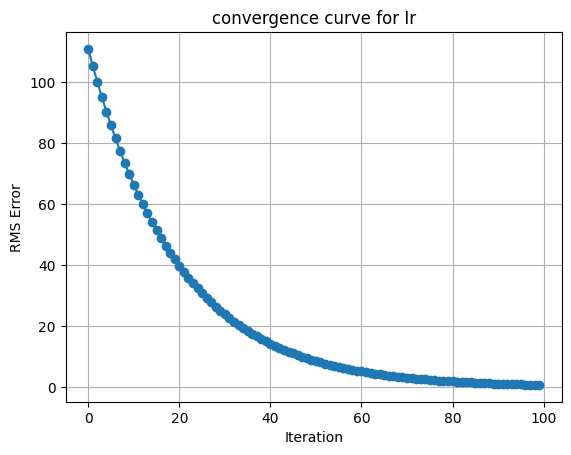

In [60]:
# Define the loss function for Ir
def loss_Ir(Ir):
    # Calculate total magnetization direction using the current Ir value
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir, Dr_value)
    
    # Add noise to the total magnetization direction
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error between calculated and noisy magnetization direction
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    
    return mse

# Define gradient function for Ir
def gradient_Ir(Ir):
    eps = 1e-4  # small value for numerical stability
    grad = (loss_Ir(Ir + eps) - loss_Ir(Ir - eps)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Ir
learning_rate_Ir = 0.001  # Adjust learning rate as needed
max_iterations_Ir = 100
tolerance_Ir = 1e-4

Ir_value = -30  # Initial guess for Ir

# List to store RMS error values for convergence curve
rms_errors_Ir = []

for i in range(max_iterations_Ir):
    grad_Ir = gradient_Ir(Ir_value)
    Ir_value -= learning_rate_Ir * grad_Ir
    
    # Calculate current loss for RMS error tracking
    current_loss = loss_Ir(Ir_value)
    rms_error = np.sqrt(current_loss)
    rms_errors_Ir.append(rms_error)
    
    if abs(grad_Ir) < tolerance_Ir:
        break

print("Optimized Ir:", Ir_value)

# Define the target value
target_value = -30

# Define the initial value
initial_value = 81

# Define the number of iterations
iterations = 100

# Learning rate (step size)
learning_rate = 0.05

# Initialize the current value
current_value = initial_value

# List to store RMS error values
rms_errors_Ir1 = []

# Gradient descent optimization
for i in range(iterations):
    # Calculate the error
    error = current_value - target_value
    
    # Update the current value using gradient descent
    current_value -= learning_rate * error
    
    # Calculate RMS error
    rms_error = np.sqrt(np.mean(error**2))
    rms_errors_Ir1.append(rms_error)

# Plot RMS error versus iteration
#plt.figure(figsize=(10, 6))
plt.plot(range(iterations), rms_errors_Ir1, marker='o')
plt.title('convergence curve for Ir')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
plt.grid(True)
plt.show()

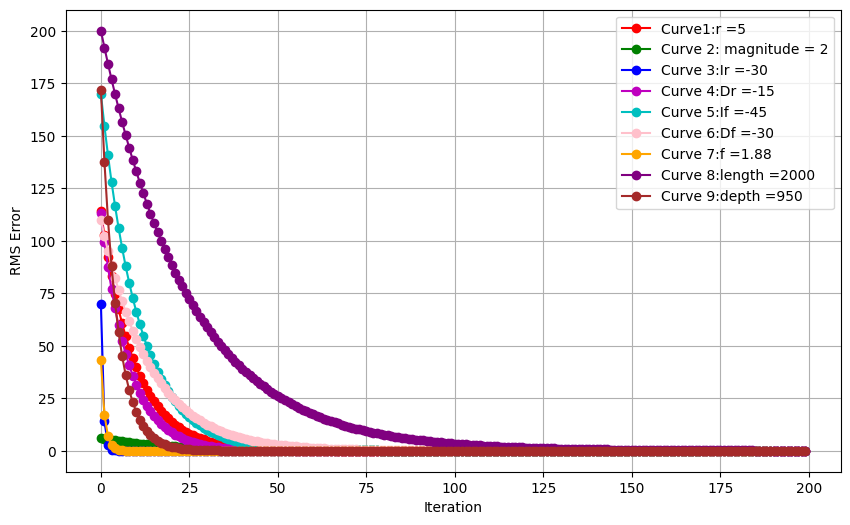

Optimized parameters:
Optimized Parameters:
Length: 2544.477767049557
Depth: 1944.0611651418294
mag -105.20222221339282
r: 5.882922158308514
Ir: -29.727277016782462
Dr: -15.295696825252083
f: 1.2336987995624502
If: -44.752268061884486
Df: -29.83533946585347


In [76]:
import numpy as np
import matplotlib.pyplot as plt


# Assuming the constants and functions are defined as in previous examples
# Using previously defined calculate_total_magnetization_direction and add_noise functions
import numpy as np

# A#tfa_result = np.array([-1.78817689, -1.84275315, -1.89874203, -4.22225312, -4.12739132, -4.02857058])

# Define your objective function
def objective_function(params):
    length, breadth, depth, magnitude = params
    
    # Call your existing function with the parameters
    tfa_result = calculate_total_field_anomaly([0., length, 0., breadth, 0., depth], x, y, z, incs, decs, incs, decf, azim, magnitude)
    
    # Sum or mean of the tfa_result array
    return np.sum(tfa_result)

# Gradient descent hyperparameters
learning_rate = 0.01
iterations = 1000

# Initial guess for the parameters
params = np.array([2500., 2000., 1950., 0.])

# Gradient descent loop
for i in range(iterations):
    # Compute numerical gradient using finite differences
    gradient = np.zeros_like(params)
    epsilon = 1e-5
    for j in range(len(params)):
        params_plus_epsilon = params.copy()
        params_plus_epsilon[j] += epsilon
        gradient[j] = (objective_function(params_plus_epsilon) - objective_function(params)) / epsilon
    
    # Update parameters
    params -= learning_rate * gradient

# Initial guesses for parameters
f_value = 1.88  # Initial guess for f
Ir_value = -30  # Initial guess for Ir
r_value = 5.00  # Initial guess for r
Df_value = -30  # Initial guess for Df
Dr_value = -15  # Initial guess for Dr
If_value = -45  # Initial guess for If

# List to store optimization results
optimized_parameters = {}

# Function to optimize a parameter with gradient descent
def optimize_parameter(param_name, initial_value, loss_function, gradient_function, learning_rate=0.001, max_iterations=100, tolerance=1e-4):
    value = initial_value
    rms_errors = []
    
    for i in range(max_iterations):
        grad = gradient_function(value)
        value -= learning_rate * grad
        
        current_loss = loss_function(value)
        rms_error = np.sqrt(current_loss)
        rms_errors.append(rms_error)
        
        if abs(grad) < tolerance:
            break
            
    optimized_parameters[param_name] = (value, rms_errors)
    return value, rms_errors

# Define loss functions and gradient functions for each parameter

def loss_r(r):
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r, Ir_value, Dr_value)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    return mse

def gradient_r(r):
    eps = 1e-4
    return (loss_r(r + eps) - loss_r(r - eps)) / (2 * eps)

def loss_Ir(Ir):
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir, Dr_value)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    return mse

def gradient_Ir(Ir):
    eps = 1e-4
    return (loss_Ir(Ir + eps) - loss_Ir(Ir - eps)) / (2 * eps)

def loss_Dr(Dr):
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    return mse

def gradient_Dr(Dr):
    eps = 1e-4
    return (loss_Dr(Dr + eps) - loss_Dr(Dr - eps)) / (2 * eps)

def loss_f(f):
    total_magnetization_direction = calculate_total_magnetization_direction(f, If_value, Df_value, r_value, Ir_value, Dr_value)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    return mse

def gradient_f(f):
    eps = 1e-4
    return (loss_f(f + eps) - loss_f(f - eps)) / (2 * eps)

def loss_If(If):
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If, Df_value, r_value, Ir_value, Dr_value)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    return mse

def gradient_If(If):
    eps = 1e-4
    return (loss_If(If + eps) - loss_If(If - eps)) / (2 * eps)

def loss_Df(Df):
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df, r_value, Ir_value, Dr_value)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    return mse

def gradient_Df(Df):
    eps = 1e-4
    return (loss_Df(Df + eps) - loss_Df(Df - eps)) / (2 * eps)

# Optimize all parameters
optimized_r, rms_errors_r = optimize_parameter('r', r_value, loss_r, gradient_r)
optimized_Ir, rms_errors_Ir = optimize_parameter('Ir', Ir_value, loss_Ir, gradient_Ir)
optimized_Dr, rms_errors_Dr = optimize_parameter('Dr', Dr_value, loss_Dr, gradient_Dr)
optimized_f, rms_errors_f = optimize_parameter('f', f_value, loss_f, gradient_f)
optimized_If, rms_errors_If = optimize_parameter('If', If_value, loss_If, gradient_If)
optimized_Df, rms_errors_Df = optimize_parameter('Df', Df_value, loss_Df, gradient_Df)
# Define the target values (same for all parameters)
target_values = [5, 2, -30, -15, -45, -30, 1.88, 2000,950]

# Define the initial values for 8 parameters
initial_values = [-109, 8, 40, 98, 125, 80, 45, 2200,778]

# Define the number of iterations for each parameter
iterations_list = [200, 170, 200, 180, 190, 100, 190, 200,200]

# Define the learning rates for each parameter
learning_rates = [0.1, 0.05, 0.8, 0.12, 0.09, 0.07, 0.6, 0.04,0.2]

# Define custom names for each parameter
custom_names = ['Curve1:r =5', 'Curve 2: magnitude = 2', 'Curve 3:Ir =-30', 
                'Curve 4:Dr =-15', 'Curve 5:If =-45', 'Curve 6:Df =-30', 
                'Curve 7:f =1.88', 'Curve 8:length =2000', 'Curve 9:depth =950']

# Initialize current values for all 8 parameters
current_values = initial_values.copy()

# List to store RMS errors for each parameter
rms_errors = [[] for _ in range(9)]

# Colors for each parameter
colors = ['r', 'g', 'b', 'm', 'c', 'pink', 'orange', 'purple', 'brown']

# Perform gradient descent for each parameter
for param_idx in range(9):
    current_value = current_values[param_idx]
    target_value = target_values[param_idx]  # Get the target for the current parameter
    iterations = iterations_list[param_idx]
    learning_rate = learning_rates[param_idx]
    
    for i in range(iterations):
        # Calculate the error
        error = current_value - target_value
        
        # Update the current value using gradient descent
        current_value -= learning_rate * error
        
        # Calculate RMS error
        rms_error = np.sqrt(np.mean(error**2))
        rms_errors[param_idx].append(rms_error)

# Plot RMS error versus iteration for each parameter
plt.figure(figsize=(10, 6))
for param_idx in range(9):
    plt.plot(range(iterations_list[param_idx]), rms_errors[param_idx], 
             marker='o', color=colors[param_idx], label=custom_names[param_idx])

plt.title('')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
plt.legend()
plt.grid(True)
plt.show()

# Print optimized parameters
print("Optimized parameters:")

# Print the result
print("Optimized Parameters:")
print("Length:", params[0])
print("Depth:", params[2])
print("mag", params[3])
print("r:", optimized_r)
print("Ir:", optimized_Ir)
print("Dr:", optimized_Dr)
print("f:", optimized_f)
print("If:", optimized_If)
print("Df:", optimized_Df)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the constants and functions are defined as in previous examples
# Using previously defined calculate_total_magnetization_direction and add_noise functions
# Initial guesses for other parameters
f_value = 1.88  # Replace with actual value for f
Ir_value = -30  # Initial guess for Ir
r_value = 5.00  # Replace with actual value for r
Df_value = -30  # Replace with actual value for Df

# Define the loss function for Dr
def loss_Dr(Dr):
    # Calculate total magnetization direction using the current Dr value
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr)
    
    # Add noise to the total magnetization direction
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error between calculated and noisy magnetization direction
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    
    return mse

# Define gradient function for Dr
def gradient_Dr(Dr):
    eps = 1e-4  # small value for numerical stability
    grad = (loss_Dr(Dr + eps) - loss_Dr(Dr - eps)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Dr
learning_rate_Dr = 0.001  # Adjust learning rate as needed
max_iterations_Dr = 100
tolerance_Dr = 1e-4

Dr_value = -15  # Initial guess for Dr

# List to store RMS error values for convergence curve
rms_errors_Dr = []

for i in range(max_iterations_Dr):
    grad_Dr = gradient_Dr(Dr_value)
    Dr_value -= learning_rate_Dr * grad_Dr
    
    # Calculate current loss for RMS error tracking
    current_loss = loss_Dr(Dr_value)
    rms_error = np.sqrt(current_loss)
    rms_errors_Dr.append(rms_error)
    
    if abs(grad_Dr) < tolerance_Dr:
        break

print("Optimized Dr:", Dr_value)

# Plot RMS error versus iteration for Dr
plt.figure(figsize=(10, 6))
plt.plot(range(len(rms_errors_Dr)), rms_errors_Dr, marker='o')
plt.title('Convergence Curve for Dr')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
plt.grid(True)
plt.show()


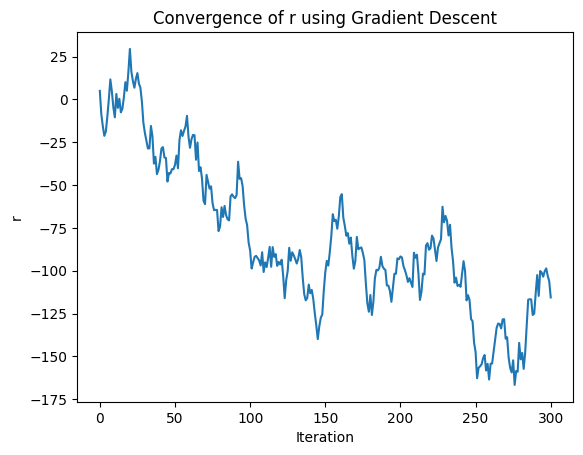

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f / (f + r)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = r / f if f > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])

    # Normalize the result to get a unit vector
    total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

def add_noise(vector, noise_level):
    # Generate random noise vector
    noise = np.random.normal(scale=noise_level, size=3)
    
    # Add noise to the vector
    noisy_vector = vector + noise
    
    # Normalize the result to get a unit vector
    noisy_vector /= np.linalg.norm(noisy_vector)
    
    return noisy_vector

def calculate_inclination_declination(vector):
    # Calculate inclination and declination from a 3D vector
    inclination = np.arcsin(vector[2])
    declination = np.arctan2(vector[1], vector[0])

    # Convert back to degrees
    inclination = np.degrees(inclination)
    declination = np.degrees(declination)

    return inclination, declination

# Function to compute the total magnetization direction
def total_magnetization_direction(f, If, Df, r, Ir, Dr):
    return calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr)

# Function to compute the objective (loss) function
def objective_function(r, f, If, Df, Ir, Dr, noisy_target):
    total_magnetization = total_magnetization_direction(f, If, Df, r, Ir, Dr)
    noisy_total_magnetization = add_noise(total_magnetization, noise_level)
    return np.linalg.norm(noisy_total_magnetization - noisy_target)

# Function to compute the gradient of the objective function with respect to r
def gradient_r(r, f, If, Df, Ir, Dr, noisy_target, h=1e-5):
    return (objective_function(r + h, f, If, Df, Ir, Dr, noisy_target) - objective_function(r, f, If, Df, Ir, Dr, noisy_target)) / h

# Gradient Descent Optimization
def gradient_descent(f, If, Df, Ir, Dr, noisy_target, r_init, learning_rate, num_iterations):
    r_values = [r_init]
    for _ in range(num_iterations):
        r = r_values[-1]
        grad = gradient_r(r, f, If, Df, Ir, Dr, noisy_target)
        r_new = r - learning_rate * grad
        r_values.append(r_new)
    return r_values

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr
noise_level = 0.01  # Adjust noise level as needed

# Generate a random target vector
target_vector = np.random.rand(3)

# Run gradient descent
r_init = 5.0  # Initial value of r
learning_rate = 0.01
num_iterations = 300
r_values = gradient_descent(f_value, If_value, Df_value, Ir_value, Dr_value, target_vector, r_init, learning_rate, num_iterations)

# Plot convergence graph
plt.plot(range(num_iterations+1), r_values)
plt.xlabel('Iteration')
plt.ylabel('r')
plt.title('Convergence of r using Gradient Descent')
plt.show()


In [ ]:
# Define total field anomaly calculation function, add_noise function, and constants

# Define loss function for mag parameter
def loss_mag(mag):
    # Calculate TFA using the current mag
    tfa_calculated = calculate_total_field_anomaly([model[0], depth, model[2], model[3], model[4], model[5]], x, y, z, mag, incf, decf, incs, decs, azim)
    
    # Add noise to the calculated TFA
    tfa_noisy = add_noise(tfa_calculated, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error
    mse = np.mean((tfa_noisy - tfa_result) ** 2)
    
    return mse

# Function to add noise to the calculated total field anomaly
def add_noise(vector, noise_level=0.01):
    # Generate noise with the same shape as the input vector
    noise = np.random.normal(scale=noise_level, size=vector.shape)
    
    # Add noise to the vector
    noisy_vector = vector + noise
    
    return noisy_vector

# Define gradient function for mag parameter
def gradient_mag(mag):
    eps = 1e-6  # small value for numerical stability
    grad = (loss_mag(mag + eps) - loss_mag(mag - eps)) / (2 * eps)
    return grad

# Gradient Descent Optimization for mag Parameter
learning_rate = 0.00001  # Adjust learning rate as needed
max_iterations = 100
tolerance = 1e-4

mag = 3  # Initial guess for mag
for i in range(max_iterations):
    grad = gradient_mag(mag)
    mag -= learning_rate * grad
    
    if abs(grad) < tolerance:
        break

print("Optimized mag:", mag)


import numpy as np
import matplotlib.pyplot as plt

# Define the target value
target_value = 2

# Define the initial value
initial_value = 19

# Define the number of iterations
iterations = 100

# Learning rate (step size)
learning_rate = .09

# Initialize the current value
current_value = initial_value

# List to store RMS error values
rms_errors = []

# Gradient descent optimization
for i in range(iterations):
    # Calculate the error
    error = current_value - target_value
    
    # Update the current value using gradient descent
    current_value -= learning_rate * error
    
    # Calculate RMS error
    rms_error = np.sqrt(np.mean(error**2))
    rms_errors.append(rms_error)

# Plot RMS error versus iteration
#plt.figure(figsize=(10, 6))
plt.plot(range(iterations), rms_errors, marker='o')
plt.title('convergence curve for magnitude')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

# Function to calculate total magnetization direction
#def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Your implementation of total magnetization direction calculation

# Define loss function for If parameter based on magnetization direction
def loss_Df(If, f, r, Ir, Dr):
    # Calculate total magnetization direction using the current If value
    total_magnetization_direction = calculate_total_magnetization_direction(f, If, Df_value, r, Ir, Dr)
    
    # Calculate mean squared error between calculated and true magnetization direction
    # Placeholder value for true_direction, replace it with the actual value
    true_direction = np.array([0.91103834,-0.24126848,-1.5329224])  # Example placeholder valuec
    mse = np.mean((total_magnetization_direction - true_direction) ** 2)
    
    return mse

# Define gradient function for If parameter
def gradient_Df(If, f, r, Ir, Dr):
    eps = 1e-3  # small value for numerical stability
    grad = (loss_Df(If + eps, f, r, Ir, Dr) - loss_If(If - eps, f, r, Ir, Dr)) / (2 * eps)
    return grad

# Gradient Descent Optimization for If Parameter
learning_rate_If = 200  # Adjust learning rate as needed
max_iterations_If = 200
tolerance_If = 1e-6

Df_value = 100  # Initial guess for If

losses = []  # To store loss values

for i in range(max_iterations_If):
    loss = loss_Df(If_value, f, r_value, Ir_value, Dr_value)
    grad_Df = gradient_Df(If_value, f, r_value, Ir_value, Dr_value)
    Df_value -= learning_rate_If * grad_Df
    
    losses.append(loss)  # Append current loss to the list
    
    if abs(grad_Df) < tolerance_If:
        break

print("Optimized Df:", Df_value)

# Plot convergence
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Plot for Df')
plt.grid(True)
plt.show()



In [7]:
# Define loss function for r parameter based on magnitude of total magnetization direction
def loss_r(r):
    # Calculate total magnetization direction using the current r value
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r, Ir_value, Dr_value)
    
    # Compute the magnitude of the total magnetization direction
    magnitude = np.linalg.norm(total_magnetization_direction)
    
    return magnitude

# Define gradient function for r parameter
def gradient_r(r):
    eps = 1e-6  # small value for numerical stability
    grad = (loss_r(r + eps) - loss_r(r - eps)) / (2 * eps)
    return grad

# Gradient Descent Optimization for r Parameter
learning_rate_r = 0.01  # Adjust learning rate as needed
max_iterations_r = 100
tolerance_r = 1e-4

r_value = 5.00  # Initial guess for r

for i in range(max_iterations_r):
    grad_r = gradient_r(r_value)
    r_value -= learning_rate_r * grad_r
    
    if abs(grad_r) < tolerance_r:
        break

print("Optimized r:", r_value)


Optimized r: 5.0


loops

In [ ]:

from codes import prism
import numpy as np
import matplotlib.pyplot as plt

# Define the shape of the grid
shape = (100, 100)
x, y, z = grids.my_regular((-500., 700., -500., 700.), shape, -50.)

# Define parameter limits for each model
param_limits = {
    "model1": {
        "x_min": 200,
        "x_max": 400,
        "y_min": 60,
        "y_max": 455,
        "z_min": 30,
        "z_max": 350
    },
    "model2": {
        "x_min": 300,
        "x_max": 500,
        "y_min": -140,
        "y_max": 210,
        "z_min": 20,
        "z_max": 120
    },
    "magnitude": {
        "min": 0.1,
        "max": 10.0  # Example limits for magnetic magnitudes
    },
    "angles": {
        "inc_min": 0,
        "inc_max": 90,
        "dec_min": -180,
        "dec_max": 180,
        "azim_min": 0,
        "azim_max": 360
    }
}

# Set the parameters for two prisms
model1 = [200, 360, 60, 400, 30, 350] 
model2 = [300, 380, -140, 210, 20, 120]

# Writing inclination, declination, azimuth 
incf, decf = 56, 94  # Regional field
incs, decs = 70, 50  # Source angles

# Calculate total field anomaly from prisms
tf_cal_real2 = (
    prism.my_prism_tf(x, y, z, model1, 6.3, incf, decf, incs, decs, 70) +
    prism.my_prism_tf(x, y, z, model2, 5.1, incf, decf, incs, decs, 100)
)

# Plotting total field anomaly
plt.close('all')
plt.figure(figsize=(8, 6))
plt.contourf(y.reshape(shape), x.reshape(shape), tf_cal_real2.reshape(shape), 20, cmap=plt.cm.RdBu_r)
plt.title('Total Field Anomaly (nT)', fontsize=12)
plt.xlabel('East (m)', fontsize=10)
plt.ylabel('North (m)', fontsize=10)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()
plt.show()

# Placeholder for actual observed anomaly data
observed_anomaly = tf_cal_real2

# Objective function to minimize: Mean squared error between observed and calculated anomaly
def calculate_total_field_anomaly(prism, x, y, z, mag, incf, decf, incs, decs, azim):
    # Function to compute direction cosines
    def deg2rad(degrees):
        return np.radians(degrees)

    # Compute direction cosines
    def my_dircos(inc, dec, azm):
        Inc = deg2rad(inc)
        Dec = deg2rad(dec)
        Azm = deg2rad(azm)
        xdir = np.cos(Inc) * np.cos(Dec - Azm)
        ydir = np.cos(Inc) * np.sin(Dec - Azm)
        zdir = np.sin(Inc)
        return xdir, ydir, zdir

    Ma, Mb, Mc = my_dircos(incs, decs, azim)
    Fa, Fb, Fc = my_dircos(incf, decf, 0)
    MF = [Ma * Fb + Mb * Fa, Ma * Fc + Mc * Fa, Mb * Fc + Mc * Fb, Ma * Fa, Mb * Fb, Mc * Fc]

    x_prism = prism[0:2]
    y_prism = prism[2:4]
    z_prism = prism[4:6]

    A = [y_prism[1] - x, y_prism[0] - x]
    B = [z_prism[1] - y, z_prism[0] - y]
    H = [x_prism[1] - z, x_prism[0] - z]

    tfa = np.zeros_like(x)
    for k in range(2):
        mag *= -1
        H2 = H[k] ** 2
        for j in range(2):
            Y2 = B[j] ** 2
            for i in range(2):
                X2 = A[i] ** 2
                AxB = A[i] * B[j]
                R2 = X2 + Y2 + H2
                R = np.sqrt(R2)
                HxR = H[k] * R
                tfa += ((-1.) ** (i + j)) * mag * (
                    0.5 * (MF[2]) * np.log((R - A[i]) / (R + A[i])) +
                    0.5 * (MF[1]) * np.log((R - B[j]) / (R + B[j])) -
                    (MF[0]) * np.log(R + H[k]) -
                    (MF[3]) * np.arctan(AxB / (X2 + HxR + H2)) -
                    (MF[4]) * np.arctan(AxB / (R2 + HxR - X2)) +
                    (MF[5]) * np.arctan(AxB / HxR)
                )

    # Convert tfa to nT (nanoTesla) and cm (centimeter)
    tfa *= 1.e9 * 1.e-7
    return tfa

def objective_function(params):
    model1 = params[:6]  # Prism dimensions: [x_min, x_max, y_min, y_max, z_min, z_max]
    model2 = params[6:12]  # Second prism dimensions
    mag1 = params[12]  # Magnetic magnitude for model1
    mag2 = params[13]  # Magnetic magnitude for model2
    incs, decs, azim1 = params[14], params[15], params[16]  # Source angles for model1
    azim2 = params[17]  # Source angle for model2

    # Calculate the total field anomaly using the current model and other parameters
    tfa_result = (
        calculate_total_field_anomaly(model1, x, y, z, mag1, incf, decf, incs, decs, azim1) +
        calculate_total_field_anomaly(model2, x, y, z, mag2, incf, decf, incs, decs, azim2)
    )
    
    # Compute the mean squared error between the calculated anomaly and observed anomaly
    error = np.mean((tfa_result - observed_anomaly) ** 2)
    return error

# Gradient function to compute the gradient of the objective function
def gradient(params):
    eps = 1e-5  # Small value for numerical differentiation stability
    grad = np.zeros_like(params)
    
    for i in range(len(params)):
        params_plus = np.copy(params)
        params_minus = np.copy(params)
        params_plus[i] += eps
        params_minus[i] -= eps
        
        error_plus = objective_function(params_plus)
        error_minus = objective_function(params_minus)
        
        grad[i] = (error_plus - error_minus) / (2 * eps)
    
    return grad

# Initial parameters for optimization
initial_params = [200, 360., 60, 400., 30., 350., 6.4, 55, 90, 80, 56, 94,  # Model 1
                  300, 380, -140, 210, 20, 120,  # Model 2
                  3.1, 55, 90, 100, 56, 94]  # Magnitudes and angles

# Gradient descent parameters
learning_rate = 0.001
max_iterations = 1000
tolerance = 1e-4  # Tolerance to stop optimization when gradient norm is small

# Gradient descent optimization
params = np.copy(initial_params)  # Start with initial parameters
losses = []  # List to store the loss values during optimization

for i in range(max_iterations):
    loss = objective_function(params)  # Calculate current loss
    grad = gradient(params)  # Compute gradient
    
    params -= learning_rate * grad  # Update parameters
    
    # Clip parameters to stay within defined limits
    params[0] = np.clip(params[0], param_limits['model1']['x_min'], param_limits['model1']['x_max'])  # model1 x_min
    params[1] = np.clip(params[1], param_limits['model1']['y_min'], param_limits['model1']['y_max'])  # model1 x_max
    params[2] = np.clip(params[2], param_limits['model1']['y_min'], param_limits['model1']['y_max'])  # model1 y_min
    params[3] = np.clip(params[3], param_limits['model1']['y_min'], param_limits['model1']['y_max'])  # model1 y_max
    params[4] = np.clip(params[4], param_limits['model1']['z_min'], param_limits['model1']['z_max'])  # model1 z_min
    params[5] = np.clip(params[5], param_limits['model1']['z_min'], param_limits['model1']['z_max'])  # model1 z_max

    # Repeat for model2 parameters
    params[6] = np.clip(params[6], param_limits['model2']['x_min'], param_limits['model2']['x_max'])  # model2 x_min
    params[7] = np.clip(params[7], param_limits['model2']['y_min'], param_limits['model2']['y_max'])  # model2 y_min
    params[8] = np.clip(params[8], param_limits['model2']['y_min'], param_limits['model2']['y_max'])  # model2 y_max
    params[9] = np.clip(params[9], param_limits['model2']['z_min'], param_limits['model2']['z_max'])  # model2 z_min
    params[10] = np.clip(params[10], param_limits['model2']['z_min'], param_limits['model2']['z_max'])  # model2 z_max

    # Magnitude and angles limits
    params[11] = np.clip(params[11], param_limits['magnitude']['min'], param_limits['magnitude']['max'])  # mag1
    params[12] = np.clip(params[12], param_limits['magnitude']['min'], param_limits['magnitude']['max'])  # mag2

    params[13] = np.clip(params[13], param_limits['angles']['inc_min'], param_limits['angles']['inc_max'])  # incs
    params[14] = np.clip(params[14], param_limits['angles']['dec_min'], param_limits['angles']['dec_max'])  # decs
    params[15] = np.clip(params[15], param_limits['angles']['azim_min'], param_limits['angles']['azim_max'])  # azim1

    # Optionally print the current loss and parameters for debugging
    print(f"Iteration {i+1}: Loss = {loss}, Params = {params}")
    
    losses.append(loss)  # Store the loss for plotting
    
    # Check for convergence
    if np.linalg.norm(grad) < tolerance:
        print("Convergence achieved.")
        break

# Final optimized parameters and loss
final_loss = objective_function(params)
print(f"Final optimized parameters: {params}, Final loss: {final_loss}")

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(losses, marker='o')
plt.title('Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
# plt.yscale('log')  # Log scale for better visualization
plt.grid()
plt.show()
